## Transportation ATB 2024 Example Notebook

In this notebook, we demonstrate how to access the 2024 transportation ATB data from OEDI's S3 storage. We will see how to explore the data and generate some plots. This notebook was created with Python 3.11.11. You will need to install the `pandas`, `seaborn` and `matplotlib` packages.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Access

There are many ways to browse and load files from S3 storage with Python. Since the Transportation ATB data files are relatively small, we recommend simply using the [bucket viewer](https://data.openei.org/s3_viewer?bucket=oedi-data-lake&prefix=ATB%2Ftransportation%2F) to explore the files and then using the S3 URL to load the contents into a pandas dataframe. Each table is available in both csv and parquet format. The parquet files are much smaller, and therefore best for this application.

In [2]:
# Load the vehicles table
df = pd.read_parquet('https://oedi-data-lake.s3.amazonaws.com/ATB/transportation/parquet/2024/v1/output/vehicles.parquet')

# Split into light duty and medium/heavy duty
ldv = df[df['vehicle_weight_category']=='Light Duty']
mdhd = df[df['vehicle_weight_category']=='Medium/Heavy Duty']

### Structure

The vehicles table is unique on the 'year', 'scenario', 'vehicle_weight_category', 'vehicle_class', 'vehicle_powertrain', 'vehicle_detail' and 'metric' columns.

In [3]:
ldv_years = ldv['year'].unique()
ldv_scenarios = ldv['scenario'].unique()
ldv_classes = ldv['vehicle_class'].unique()
ldv_powertrains = ldv['vehicle_powertrain'].unique()
print('Light Duty Years:')
print(ldv_years, '\n')
print('Light Duty Scenarios:')
print(ldv_scenarios, '\n')
print('Light Duty Classes:')
print(ldv_classes, '\n')
print('Light Duty Powertrains:')
print(ldv_powertrains)

Light Duty Years:
[2023 2025 2030 2035 2040 2045 2050] 

Light Duty Scenarios:
['Conservative' 'Mid' 'Advanced'] 

Light Duty Classes:
['Compact' 'Midsize' 'Midsize SUV' 'Pickup' 'Small SUV'] 

Light Duty Powertrains:
['Battery Electric' 'Diesel' 'Gasoline' 'Gasoline Hybrid'
 'Hydrogen Fuel Cell' 'Natural Gas' 'Plug-in Hybrid']


### Plotting

Let's focus on BEVs and generate plots of projected vehicle price and fuel economy.

In [4]:
ldv_bev = ldv[ldv['vehicle_powertrain']=='Battery Electric'].copy(deep=True)
ldv_bev_powertrain_details = ldv_bev['vehicle_detail'].unique()
ldv_bev_metrics = ldv_bev['metric'].unique()
print('Light Duty BEV powertrain detail options:')
print(ldv_bev_powertrain_details, '\n')

print('Light Duty BEV metric options:')
print(ldv_bev_metrics)

Light Duty BEV powertrain detail options:
['Battery Electric Vehicle (150-mile range)'
 'Battery Electric Vehicle (200-mile range)'
 'Battery Electric Vehicle (300-mile range)'
 'Battery Electric Vehicle (400-mile range)'] 

Light Duty BEV metric options:
['Battery Cost (2022$)'
 'Battery Cost (2022$/kWh) (pack-level, rated capacity)'
 'Fuel Economy (mi/gge)' 'Modeled Vehicle Price (2022$)' 'Range (mi)'
 'Pack Energy (kWh)']


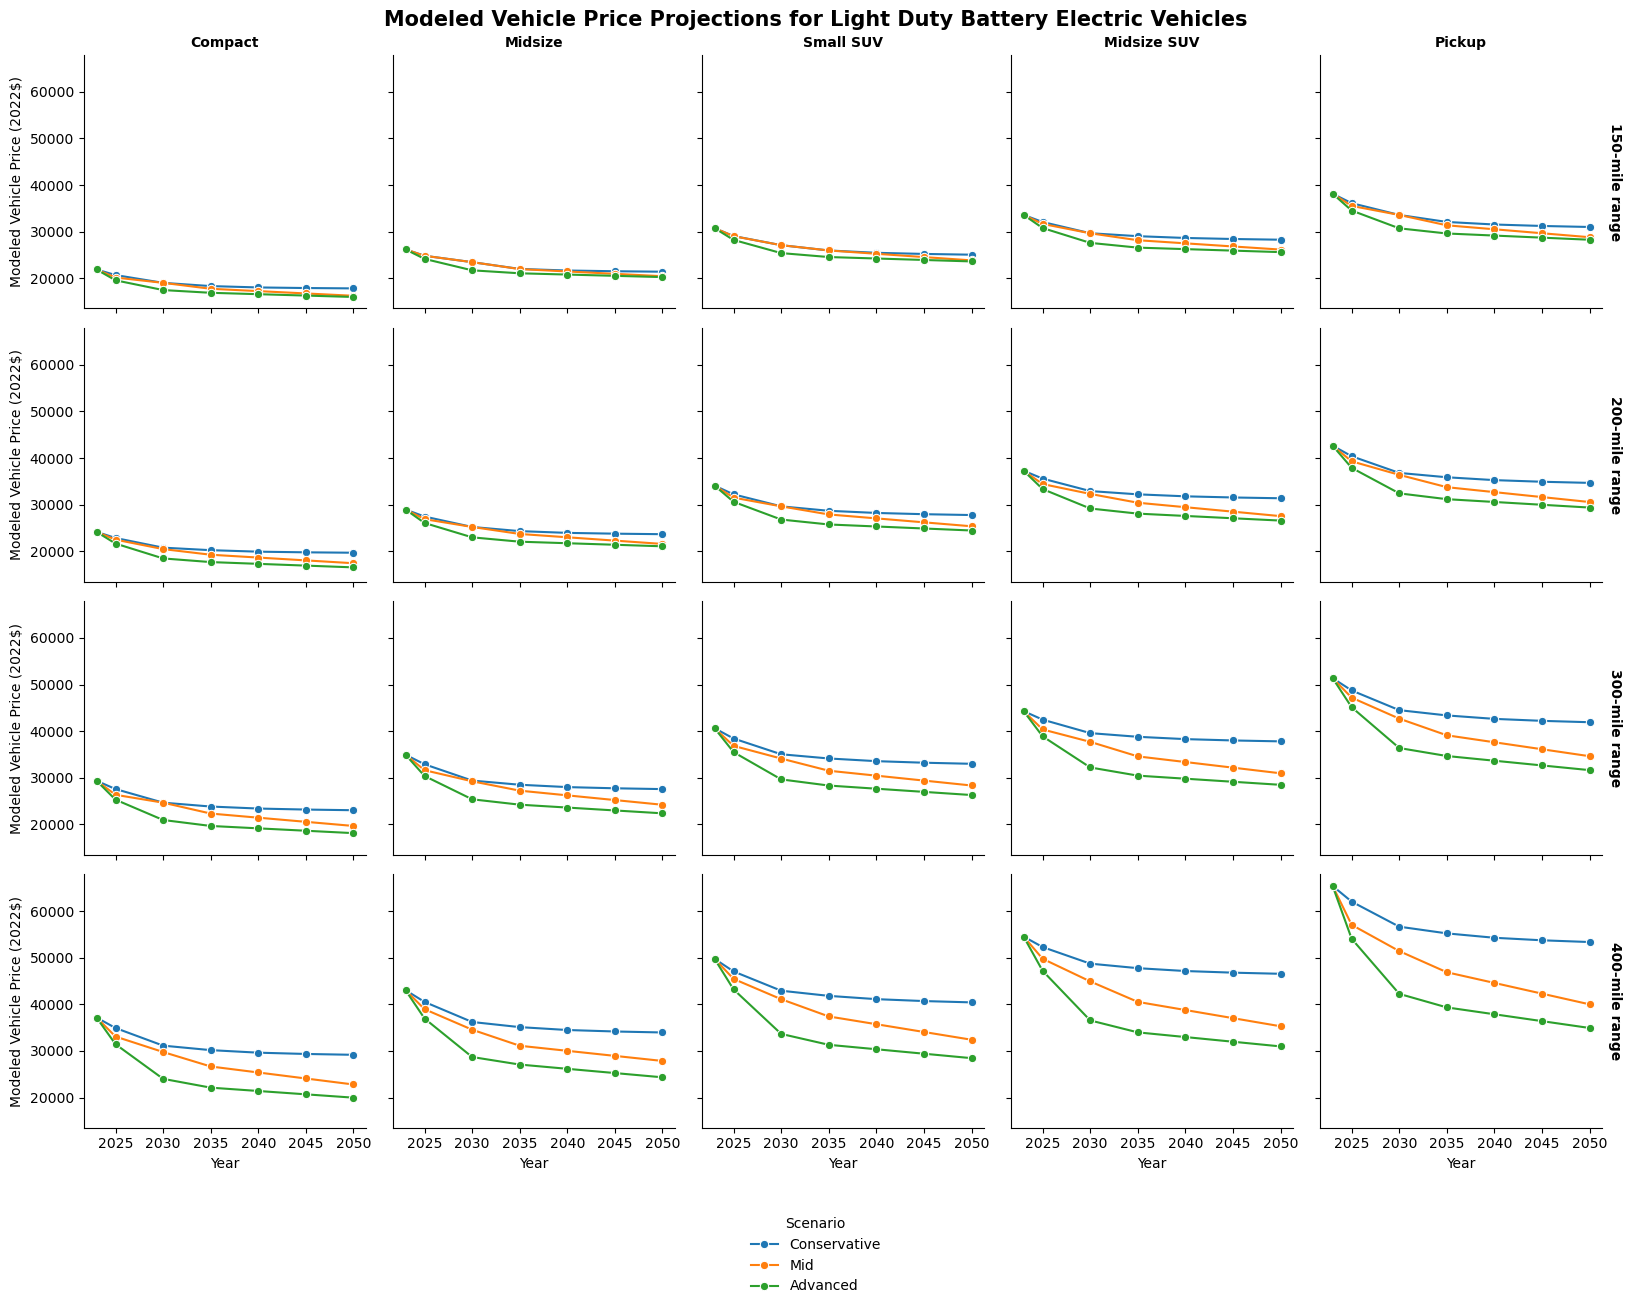

In [5]:
# Create an abreviated vehicle_detail that captures just the range
ldv_bev['range'] = ldv_bev['vehicle_detail'].str.extract('\((.*)\)')

# Create a FacetGrid for vehicle detail by class
metric = 'Modeled Vehicle Price (2022$)'
mask = ldv_bev['metric']==metric
col_order = ['Compact', 'Midsize', 'Small SUV', 'Midsize SUV', 'Pickup']
g = sns.FacetGrid(ldv_bev[mask], row='range', col='vehicle_class', col_order=col_order, hue='scenario', margin_titles=True)
g.set_titles(row_template='{row_name}', col_template='{col_name}', size=10, fontweight='bold')

# Plot the vehicle costs by scenario
g.map(sns.lineplot, 'year', 'value', marker='o')
g.set_xlabels('Year')
g.set_ylabels(metric)
g.add_legend(title="Scenario", loc="lower center", bbox_to_anchor=(.5, -.1))
g.figure.suptitle('Modeled Vehicle Price Projections for Light Duty Battery Electric Vehicles', size=15, fontweight='bold')
plt.tight_layout()

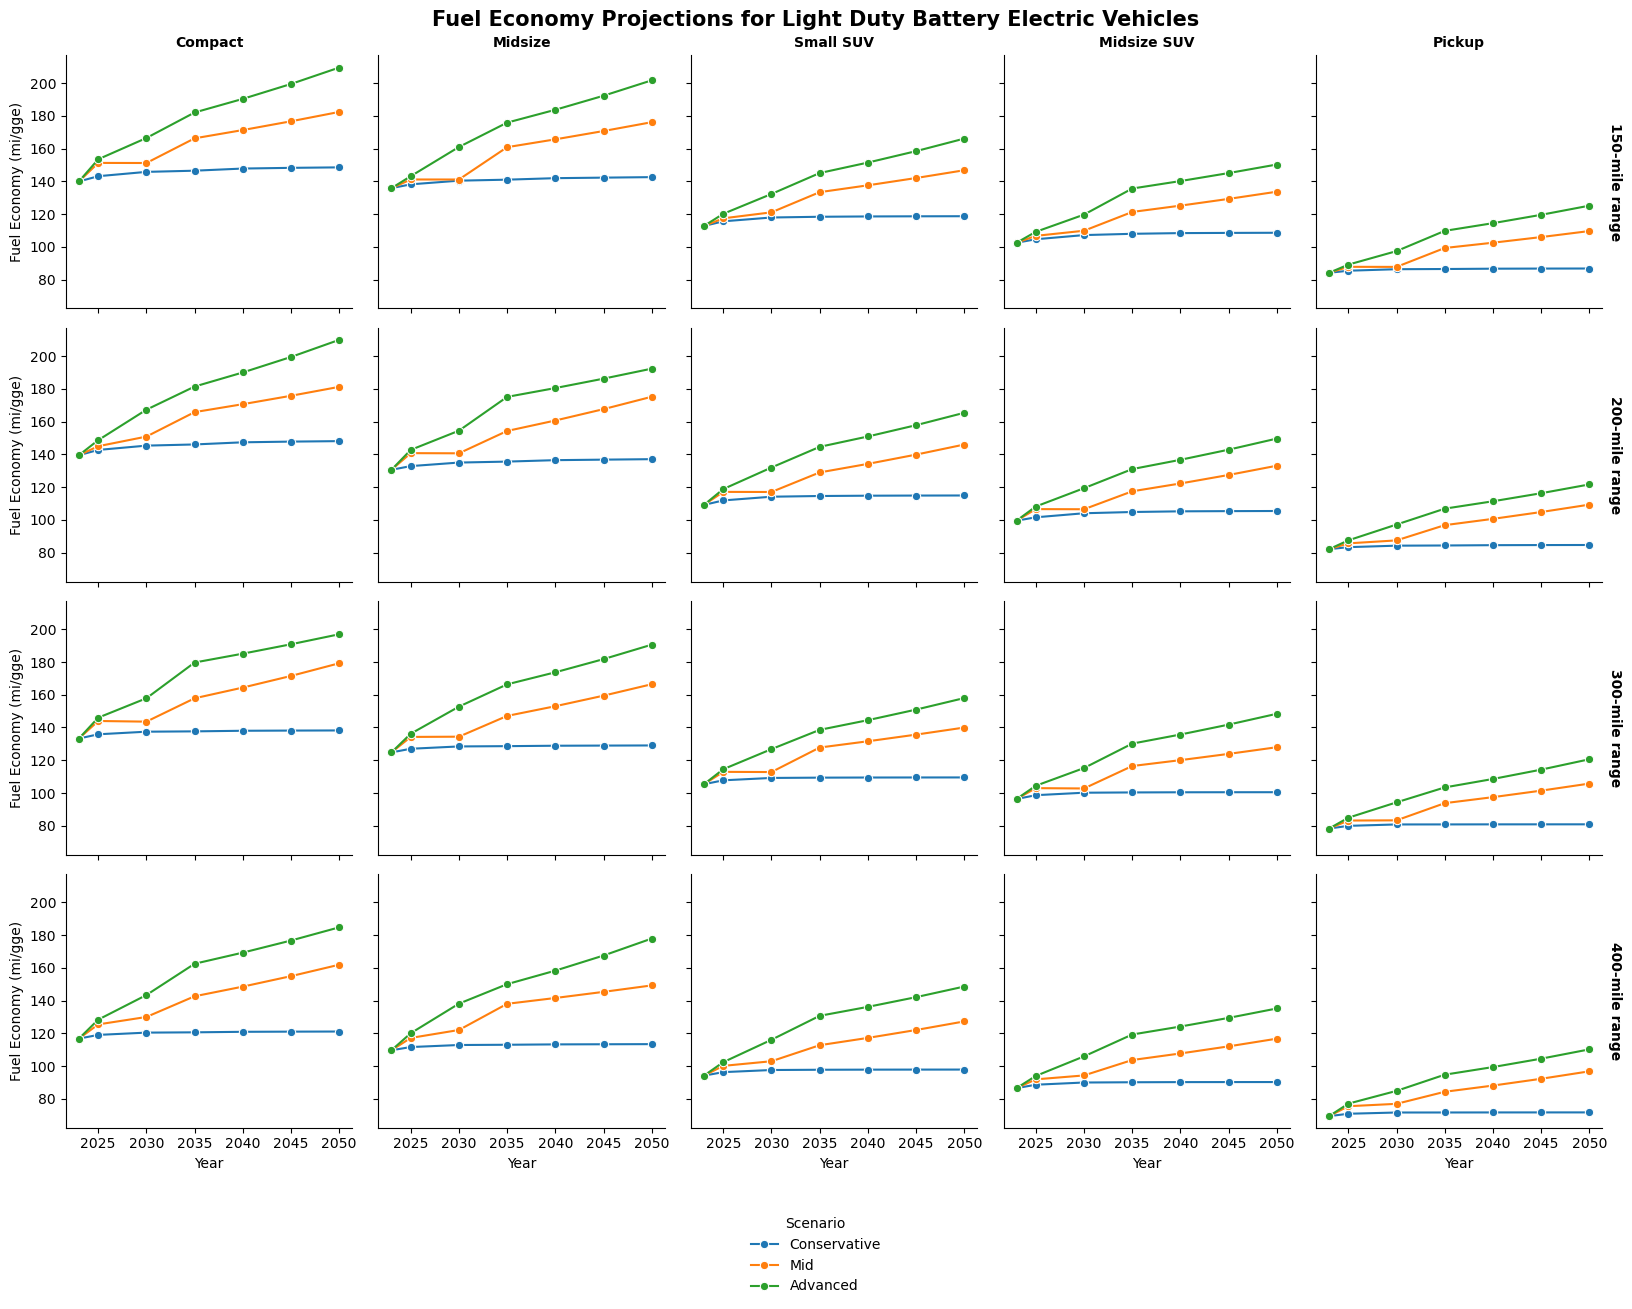

In [6]:
# Create a FacetGrid for vehicle detail by class
metric = 'Fuel Economy (mi/gge)'
mask = ldv_bev['metric']==metric
g = sns.FacetGrid(ldv_bev[mask], row='range', col='vehicle_class', col_order=col_order, hue='scenario', margin_titles=True)
g.set_titles(row_template='{row_name}', col_template='{col_name}', size=10, fontweight='bold')

# Plot the vehicle costs by scenario
g.map(sns.lineplot, 'year', 'value', marker='o')
g.set_xlabels('Year')
g.set_ylabels(metric)
g.add_legend(title="Scenario", loc="lower center", bbox_to_anchor=(.5, -.1))
g.figure.suptitle(f'Fuel Economy Projections for Light Duty Battery Electric Vehicles', size=15, fontweight='bold')
plt.tight_layout()